<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

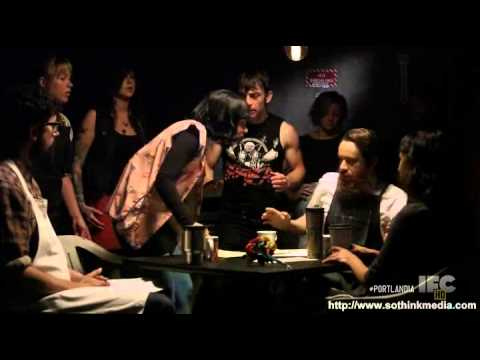

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\hkang\\repos\\unit-4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd
import spacy
import squarify
import matplotlib.pyplot as plt

In [75]:

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [76]:
# Start here 

# strip rating down to just the number
shops['star_rating'] = shops['star_rating'].str.slice(0,2)

In [77]:
# not sure if it's possible to just use a single function.  there's probably a way to do it by merging the results to the original instead of directly assigning new cols
"""
def date_split(text):
    # strip the white space that occurs at the start of every review
    text = text.strip()
    
    # split on the first space
    text_split = text.split(" ",1)
    
    return text_split[0], text_split[1]
"""

def date_split(text):
    # strip the white space that occurs at the start of every review
    text = text.strip()
    
    # split on the first space
    text_split = text.split(" ",1)
    
    return text_split[0]

def review_split(text):
    # strip the white space that occurs at the start of every review
    text = text.strip()
    
    # split on the first space
    text_split = text.split(" ",1)
    
    return text_split[1]


In [79]:
# Neither of these lines work. I'd probably have to use merge or something to assign both columns in a single step.
#shops['date'], shops['full_review_text'] = shops['full_review_text'].apply(date_split)
#shops['date'], shops['full_review_text'] = shops['full_review_text'].apply(date_split)[0], shops['full_review_text'].apply(date_split)[1]

# split the date from the review and place in new column
shops['date'] = shops['full_review_text'].apply(date_split)
shops['full_review_text'] = shops['full_review_text'].apply(review_split)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [103]:
shops

,coffee_shop_name,full_review_text,star_rating,date,review_lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[1, check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,"[1, check, list, Brunch, Spots, love, eclectic..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016,"[cool, decor, good, drink, nice, seating, , ..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[1, check, locate, Northcross, mall, shopping,..."
...,...,...,...,...,...
7611,The Steeping Room,I actually step into this restaurant by chance...,4,2/19/2015,"[actually, step, restaurant, chance, favorite,..."
7612,The Steeping Room,"Ok, The Steeping Room IS awesome. How do they ...",5,1/21/2016,"[ok, Steeping, Room, awesome, great, menu, ite..."
7613,The Steeping Room,"Loved coming here for tea, and the atmosphere ...",4,4/30/2015,"[love, come, tea, atmosphere, pretty, fresh, o..."
7614,The Steeping Room,The food is just average. The booths didn't fe...,3,8/2/2015,"[food, average, booth, feel, clean, waitstaff,..."


In [94]:
print("done 1")

# load spacy datamodel
nlp = spacy.load("en_core_web_lg")

print("done 2")

done 1
done 2


In [140]:
# add some stop words

new_stop_words = ["coffee", "place", "drink", " "]

STOPS = nlp.Defaults.stop_words.union(new_stop_words)

print("Added", new_stop_words, "to stop words")

Added ['coffee', 'place', 'drink', ' '] to stop words


In [141]:
# function for getting lemmas for a given text
# will be used with .apply() to get lemmas for entire dataframe

def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.text.lower() not in STOPS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [142]:
shops['review_lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [130]:
shops

,coffee_shop_name,full_review_text,star_rating,date,review_lemmas
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,11/25/2016,"[1, check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,12/2/2016,"[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,11/30/2016,"[1, check, list, Brunch, Spots, love, eclectic..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2,11/25/2016,"[cool, decor, good, drink, nice, seating, , ..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,12/3/2016,"[1, check, locate, Northcross, mall, shopping,..."
...,...,...,...,...,...
7611,The Steeping Room,I actually step into this restaurant by chance...,4,2/19/2015,"[actually, step, restaurant, chance, favorite,..."
7612,The Steeping Room,"Ok, The Steeping Room IS awesome. How do they ...",5,1/21/2016,"[ok, Steeping, Room, awesome, great, menu, ite..."
7613,The Steeping Room,"Loved coming here for tea, and the atmosphere ...",4,4/30/2015,"[love, come, tea, atmosphere, pretty, fresh, o..."
7614,The Steeping Room,The food is just average. The booths didn't fe...,3,8/2/2015,"[food, average, booth, feel, clean, waitstaff,..."


In [143]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['review_lemmas'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('good', 5344),
 ('great', 3917),
 ('check', 3468),
 ('like', 3379),
 ('come', 2638),
 ('time', 2383),
 ('love', 2314),
 ('Austin', 2276),
 ('1', 2251),
 ('shop', 2184)]

In [144]:
shops["review_lemmas"][0]

['1',
 'check',
 'Love',
 'love',
 'love',
 'atmosphere',
 'corner',
 'shop',
 'style',
 'swing',
 'order',
 'matcha',
 'latte',
 'muy',
 'fantastico',
 'order',
 'get',
 'pretty',
 'streamlined',
 'order',
 'iPad',
 'include',
 'beverage',
 'selection',
 'range',
 'wine',
 'desire',
 'level',
 'sweetness',
 'checkout',
 'system',
 'get',
 'latte',
 'minute',
 'hope',
 'typical',
 'heart',
 'feather',
 'latte',
 'find',
 'list',
 'possibility',
 'art',
 'idea']

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [135]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

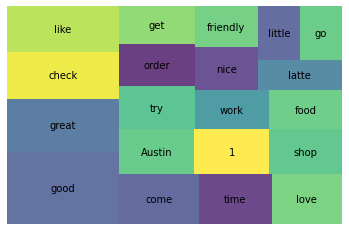

In [146]:
wc = count(shops['review_lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [148]:
wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
144,good,3575,5344,1.0,0.015468,0.015468,0.469407
113,great,2844,3917,2.0,0.011338,0.026806,0.373424
19,check,3174,3468,3.0,0.010038,0.036844,0.416754
156,like,2273,3379,4.0,0.009781,0.046625,0.298451
471,come,1932,2638,5.0,0.007636,0.054260,0.253676
...,...,...,...,...,...,...,...
16865,windowed,1,1,16867.0,0.000003,0.999988,0.000131
16866,actuality,1,1,16868.0,0.000003,0.999991,0.000131
16867,crass,1,1,16869.0,0.000003,0.999994,0.000131
16869,digestion,1,1,16870.0,0.000003,0.999997,0.000131


In [188]:
shops[any("good" in sl for sl in shops["review_lemmas"])]

KeyError: True

In [187]:
any("good" in sl for sl in shops["review_lemmas"])

True

In [181]:
x = [[1, 2, 3], [2, 3, 4]]
any(10 in sl for sl in x)

False

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

